In [1]:
import numpy as np
import scipy.sparse as spsparse
import scipy.sparse.linalg as sparsela
import matplotlib.pyplot as plt

In [2]:
x = np.load('x-idx.npy')
y = np.load('y-idx.npy')

ix = np.load('ix-idx.npy')
iy = np.load('iy-idx.npy')

bx = np.load('bx-idx.npy')
by = np.load('by-idx.npy')

bidx = np.load('b-idx.npy')

In [3]:
x0 = 0
y0 = 0

sx = 0.03
sy = 0.0025

charge_density = np.exp(-1 * (((x-x0)/(2*sx))**2 + ((y-y0)/(2*sy))**2))

charge_density[bidx] = 0

In [4]:
A = spsparse.load_npz('A.npz')

In [5]:
potential = spsparse.linalg.spsolve(A, charge_density, use_umfpack=True)

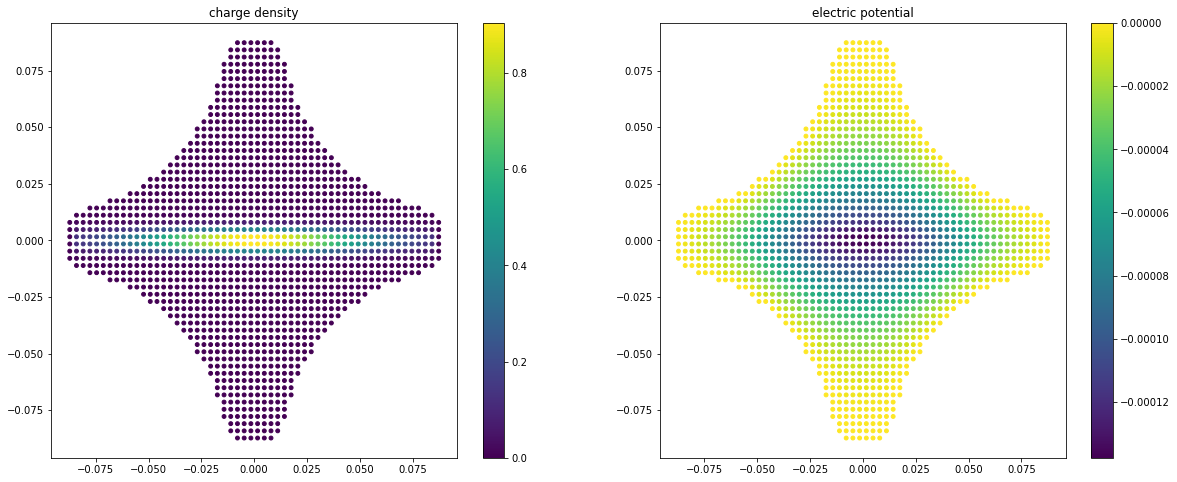

In [6]:
f,ax=plt.subplots(1,2)
f.set_size_inches(20,8)

im0 = ax[0].scatter(x, y, s=15, c=charge_density)
ax[0].set_title('charge density')
plt.colorbar(im0, ax=ax[0])

im1 = ax[1].scatter(x, y, s=15, c=potential)
ax[1].set_title('electric potential')
plt.colorbar(im1, ax=ax[1])

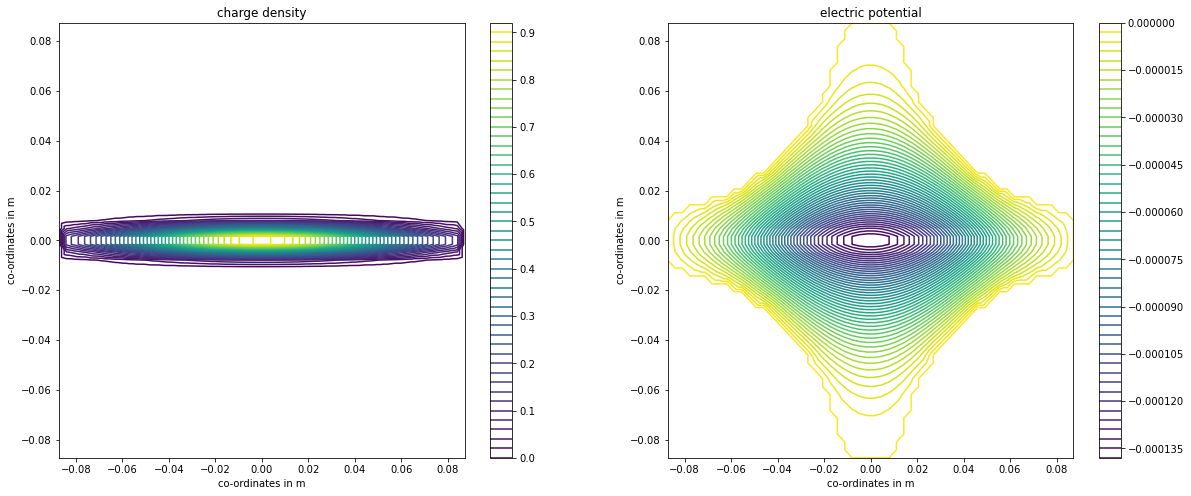

In [7]:
import matplotlib.tri as tri

f,ax=plt.subplots(1,2)
f.set_size_inches(20,8)

im0 = ax[0].tricontour(x, y, charge_density, levels=50)
ax[0].set_title('charge density')
ax[0].set_xlabel('co-ordinates in m')
ax[0].set_ylabel('co-ordinates in m')
plt.colorbar(im0, ax=ax[0])

im1 = ax[1].tricontour(x, y, potential, levels=50)
ax[1].set_title('electric potential')
ax[1].set_xlabel('co-ordinates in m')
ax[1].set_ylabel('co-ordinates in m')
plt.colorbar(im1, ax=ax[1])
